In [1]:
# import necessary packages
import pandas as pd 
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os 
from sklearn.model_selection import train_test_split
import pickle

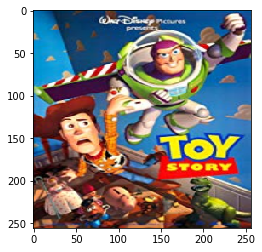

In [2]:
# an example of poster image
img = cv2.imread("0.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rs = cv2.resize(img, (256, 256))
plt.imshow(img_rs)

In [10]:
# change directory to PosterImages folder
cd PosterImages/

/Users/Sam/Desktop/CS230 Project/PosterImages


In [11]:
import re
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [12]:
# sort posters in numerical order
current = os.getcwd()
posters = sorted_alphanumeric(os.listdir(current))

In [13]:
posters

['0.jpg',
 '1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '39.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '51.jpg',
 '54.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '60.jpg',
 '61.jpg',
 '62.jpg',
 '63.jpg',
 '64.jpg',
 '65.jpg',
 '66.jpg',
 '67.jpg',
 '68.jpg',
 '69.jpg',
 '72.jpg',
 '73.jpg',
 '74.jpg',
 '75.jpg',
 '76.jpg',
 '77.jpg',
 '78.jpg',
 '79.jpg',
 '80.jpg',
 '81.jpg',
 '82.jpg',
 '83.jpg',
 '84.jpg',
 '85.jpg',
 '86.jpg',
 '87.jpg',
 '88.jpg',
 '89.jpg',
 '91.jpg',
 '92.jpg',
 '93.jpg',
 '94.jpg',
 '95.jpg',
 '96.jpg',
 '97.jpg',
 '98.jpg',
 '100.jpg',
 '101.j

In [ ]:
# convert images to numpy array of (256,256,3)
X = []
for poster in posters:
    if poster != '.DS_Store':
        img = cv2.imread(poster)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_rs = cv2.resize(img, (256, 256))
        X.append(img_rs)
X = np.array(X) 

In [ ]:
# check shape
X.shape

In [ ]:
# validation
plt.imshow(X[24000])

In [ ]:
cd ..

In [ ]:
# Obtain genres/labels
Y = pd.read_csv('Movie_Genre_Labels.csv')
Y.info()

In [ ]:
# count the number of posters in each genre
Y = Y.drop('Unnamed: 0', axis=1)
count = Y.sum()
count.sort_values(ascending=False)

In [ ]:
# plot the number of posters in each genre
count.sort_values(ascending=False).plot(kind='bar')

In [ ]:
Y = Y[['Drama', 'Comedy', 'Romance', 'Action', 'Crime', 'Thriller']]

In [ ]:
#lable the poster as others, if it doesn't belong to the 6 genres
others = []
for i in range(36898):
    if Y.ix[i].sum() == 0:
        others.append(1)
    else:
        others.append(0)
Y['Others'] = others     

In [ ]:
# construct labels 
y = []
for i in range(36898):
    y.append(Y.ix[i])
y = np.array(y)

In [ ]:
# Split Train/Validation/Test Set in the ratio of 80/10/10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [ ]:
# Check shapes
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

In [ ]:
# Check if genres are equally spreaded out across the test/val/test sets
y_train.sum(axis=0)/29887, y_val.sum(axis=0)/3321, y_test.sum(axis=0)/3690

In [ ]:
plt.imshow(X_train[4]), y_train[1]

In [ ]:
current = os.getcwd()
current

In [ ]:
# export inputs and outputs 
f = open('./x_train2_{0}.txt'.format('movieposter'), 'wb')
pickle.dump(X_train, f, protocol=4)
f.close()
f = open('./x_val2_{0}.txt'.format('movieposter'), 'wb')
pickle.dump(X_val, f, protocol=4)
f.close()
f = open('./y_train2_{0}.txt'.format('movieposter'), 'wb')
pickle.dump(y_train, f, protocol=4)
f.close()
f = open('./y_val2_{0}.txt'.format('movieposter'), 'wb')
pickle.dump(y_val, f, protocol=4)
f.close()
f = open('./x_test2_{0}.txt'.format('movieposter'), 'wb')
pickle.dump(X_test, f, protocol=4)
f.close()
f = open('./y_test2_{0}.txt'.format('movieposter'), 'wb')
pickle.dump(y_test, f, protocol=4)
f.close()